# Functions


## 단축키 역할을 하는 사용자 정의 함수

확실하게 하기 위해서 네임스페이스, 프레임, 스코프에 대한 개념을 이해하고 보면 좋음


### Page 10


In [ ]:
# 점수 계산 함수 정의: 국어 30%, 영어 30%, 수학 40% 가중치로 합산
def calculate_score(kor, eng, mat):
    score = kor * 0.3 + eng * 0.3 + mat * 0.4
    return score


# 학생1의 점수 계산 (국어 99, 영어 80, 수학 72)
student1 = calculate_score(99, 80, 72)

# 80점 이상이면 합격, 미만이면 탈락 판정
if student1 > 80:
    print('합격입니다! 점수는', student1)
else:
    print('탈락입니다. 점수는', student1)

합격입니다! 점수는 82.5


In [ ]:
# 점수 계산 및 합격 여부를 함께 반환하는 함수
def calculate_score_pass(kor, eng, mat):
    # 가중평균으로 환산 점수 계산
    score = kor * 0.3 + eng * 0.3 + mat * 0.4
    # 80점 이상이면 합격(yes), 미만이면 불합격(no)
    if score > 80:
        pass_yn = 'yes'
    else:
        pass_yn = 'no'
    # 환산 점수와 합격 여부를 튜플로 반환
    return score, pass_yn


# 함수 호출 및 반환값 언팩
stu1_score, stu1_pass = calculate_score_pass(99, 80, 72)
# 환산 점수와 합격 여부 출력
print('환산점수 :', stu1_score, '합격 여부 :', stu1_pass)

환산점수 : 82.5 합격 여부 : yes


### Page 13


In [ ]:
# 지역 변수 이슈 예시: 함수 내 변수는 함수 외부에서 접근 불가
def hi():
    # 함수 내에서만 유효한 지역 변수 name
    name = input('이름은? ')
    print('hi')
    print('My name is', name, '!')


print('자기소개를 시작합니다.')
# 함수 호출
hi()
# 주의: 여기서 name은 정의되지 않았으므로 에러 발생
print(name, '님 안녕하세요')

자기소개를 시작합니다.
hi
My name is ㅇ !


NameError: name 'name' is not defined

In [ ]:
# 지역 변수를 함수의 반환값으로 사용
def hi():
    # 사용자로부터 이름 입력
    name = input('이름은? ')
    print('hi')
    print('My name is', name, '!')
    # 지역 변수 name을 반환
    return name


# 함수에서 반환된 값을 전역 변수 person에 저장
person = hi()
# 이제 전역 변수 person을 사용 가능
print(person, '님 안녕하세요')

hi
My name is  !
 님 안녕하세요


### Page 15


#### 지역 변수 전역 변수 기초


In [ ]:
# [1] 지역변수로 간주되어 에러가 나는 경우
def func1():
    # 함수 내에서 a를 수정하려 하면 a는 지역변수로 간주됨
    # 그런데 a를 읽기 전에 수정하려고 해서 UnboundLocalError 발생
    a += 2     # 지역에서 a를 먼저 읽어야 하므로 에러
    b *= 2
    print(a, b)


# 전역 변수 a, b 정의
a, b = 5, 10
# UnboundLocalError 발생
func1()

UnboundLocalError: cannot access local variable 'a' where it is not associated with a value

In [ ]:
# [2] 함수 안에서 값을 바꾸지 않고 그대로 출력 (수정 코드 주석 처리)
def func1():
    # 전역 변수 a, b를 읽기만 함 (수정하지 않음)
    # a += 2
    # b *= 2
    print(a, b)


# 전역 변수 a, b 정의
a, b = 5, 10
# 함수 호출 - 전역 변수 값 그대로 출력
func1()        # 출력: 5 10

5 10


In [ ]:
# [3] global을 사용해 전역 변수 값을 수정
def func1():
    # global 키워드로 a, b가 전역 변수임을 명시
    global a, b
    # 이제 a, b를 전역 변수로 수정 가능
    a += 2
    b *= 2
    print(a, b)


# 전역 변수 a, b 정의
a, b = 5, 10
# 함수 호출 - 전역 변수 값 변경됨
func1()        # 출력: 7 20

7 20


In [ ]:
# [4] global + 반복 호출로 누적 변화 관찰
def func1():
    # 전역 변수 a, b를 명시적으로 선언
    global a, b
    # 각 호출마다 전역 변수 값이 누적되어 변함
    a += 2
    b *= 2
    print(a, b)


# 전역 변수 a, b 초기값 설정
a, b = 5, 10
# 함수를 5번 반복 호출하면서 누적 변화 관찰
for i in range(5):
    func1()
# 출력:
# 7 20
# 9 40
# 11 80
# 13 160
# 15 320

7 20
9 40
11 80
13 160
15 320


### page 17

#### 지역 변수와 전역 변수


In [ ]:
# 상점/벌점 적용 함수 (global 미사용 - 에러 발생)
def reward_penalty(kind, points):
    # 함수 내에서 current_point 읽기만 시도
    print('현재 점수 :', current_point)
    # 전역 변수를 수정하려고 시도하면 에러 발생
    if kind == '상점':
        current_point += points
    elif kind == '벌점':
        current_point -= points
    return current_point


# 전역 변수 current_point 초기값
current_point = 5
# 함수 호출 - UnboundLocalError 발생
reward_penalty('상점', 5)
print('최종 점수 :', current_point)

UnboundLocalError: cannot access local variable 'current_point' where it is not associated with a value

In [ ]:
# 상점/벌점 적용 함수 (global 사용 - 정상 작동)
def reward_penalty(kind, points):
    # global 키워드로 current_point가 전역 변수임을 명시
    global current_point
    # 현재 점수 출력
    print('현재 점수 :', current_point)

    # 상점인 경우 점수 증가
    if kind == '상점':
        current_point += points
        print('상점 입력 후 점수 :', current_point)
    # 벌점인 경우 점수 감소
    elif kind == '벌점':
        current_point -= points
        print('벌점 입력 후 점수 :', current_point)

    # 수정된 점수 반환
    return current_point


# 전역 변수 current_point 초기값 설정
current_point = 5
# 함수 호출 - 정상적으로 전역 변수 수정
reward_penalty('상점', 5)
# 변경된 전역 변수 값 출력
print('최종 점수 :', current_point)

현재 점수 : 5
상점 입력 후 점수 : 10
최종 점수 : 10


In [ ]:
import csv

def file_open():
    # 1-1. 인구 데이터 파일 읽기
    f = open('data/LOCAL_PEOPLE_DONG_201912.csv', encoding='utf8')
    data = csv.reader(f)
    next(data)  # 헤더(첫 번째 행) 건너뛰기
    data = list(data)  # CSV 데이터를 리스트로 변환
    
    # 1-2. 행정동 코드 파일 읽기
    f2 = open('data/dong_code.csv', encoding='utf8')
    code_data = csv.reader(f2)
    next(code_data)  # 첫 번째 헤더 행 건너뛰기
    next(code_data)  # 두 번째 헤더 행 건너뛰기
    code_data = list(code_data)  # CSV 데이터를 리스트로 변환
    
    # 1-3. 데이터타입 변환하기 : 문자 --> 숫자
    # 인구데이터의 각 행을 순회하며 타입 변환
    for row in data:
        # 각 행의 1~31번 인덱스 열을 순회 (0번은 날짜 문자열이므로 제외)
        for i in range(1, 32):
            # 1~2번 인덱스(시간대, 행정동 코드)는 정수로 변환
            if i <= 2:
                row[i] = int(row[i])
            # 3번 이후 인덱스(인구수 등)는 실수로 변환
            else:
                row[i] = float(row[i])
    
    # 행정동 코드 데이터의 각 행을 순회하며 타입 변환
    for row in code_data:
        # row[1]: 행정동 코드를 문자열에서 정수로 변환
        row[1] = int(row[1])
    
    # 변환된 인구 데이터와 행정동 코드 데이터 반환
    return data, code_data

압구정동 - 11680545 를 분석합니다!


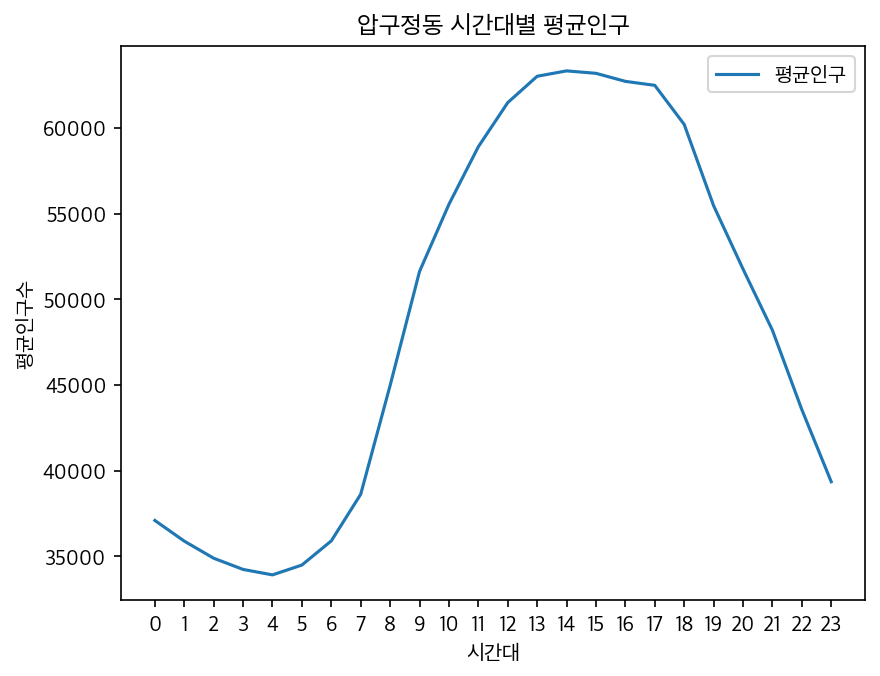

In [ ]:
# 행정동 코드 검색 함수
def dong_search(dong_name):
    # code_data의 각 행(row)을 순회하며 행정동 이름 검색
    for row in code_data:
        # row[-1]: 행의 마지막 열 = 행정동 이름
        # 입력받은 행정동 이름과 일치하는 행을 찾음
        if row[-1] == dong_name:
            # row[1]: 해당 행의 두 번째 열 = 행정동 코드 (숫자)
            code = row[1]
            # 찾은 행정동 이름과 코드를 출력
            print(dong_name, '-', code, '를 분석합니다!')
            # 행정동 코드 반환
            return code


# 시간대별 평균인구 분석 함수
def analysis1(dong_name, dong_code):
    # 3-1. 입력된 행정동의 시간대별 평균인구 구하기
    # 24시간 각 시간대별 인구수를 저장할 리스트 초기화
    population = [0 for i in range(24)]
    
    # data의 각 행(row)을 순회하며 해당 행정동의 데이터만 추출
    for row in data:
        # row[2]: 행정동 코드, 입력받은 행정동 코드와 일치하는지 확인
        if row[2] == dong_code:
            # row[1]: 시간대 (0~23), row[3]: 해당 시간대의 인구수
            time, p = row[1], row[3]
            # 해당 시간대의 인구수를 누적
            population[time] += p
    
    # 12월 31일간의 누적 인구수를 평균으로 변환
    population = [p/31 for p in population]
    
    # 3-2. 3-1에서 구한 평균인구 리스트로 꺾은선 그래프 그리기
    # 그래프 함수에 전달하기 위해 2차원 리스트로 변환
    population = [population]
    labels = ['평균인구']
    title = dong_name + ' 시간대별 평균인구'
    graph_plot(popu_list=population, label_list=labels, graph_title=title)


# 그래프 출력 함수
import matplotlib.pyplot as plt

def graph_plot(popu_list, label_list, graph_title):
    plt.figure(dpi=150)
    plt.rc('font', family='Apple SD Gothic Neo')
    plt.title(graph_title)
    for i in range(len(popu_list)):
        plt.plot(range(24), popu_list[i], label=label_list[i])
    plt.legend()
    plt.xlabel('시간대')
    plt.ylabel('평균인구수')
    plt.xticks(range(24), range(24))
    plt.show()


# 메인 실행 코드
data, code_data = file_open()
input_name = input('핫플레이스가 위치한 행정동을 입력하세요 --> ')
input_code = dong_search(input_name)
analysis1(dong_name=input_name, dong_code=input_code)

압구정동 - 11680545 를 분석합니다!


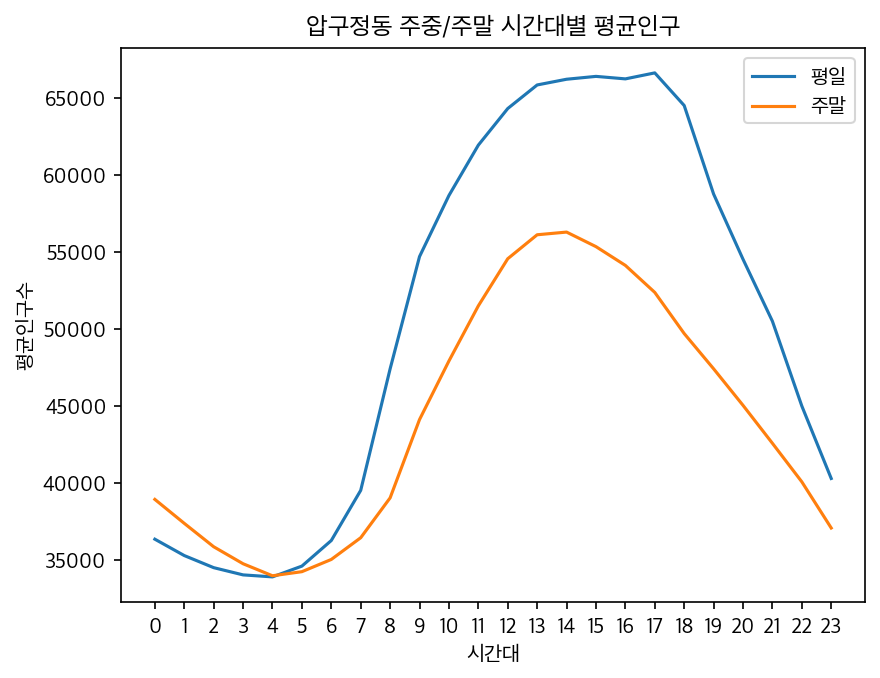

In [ ]:
import datetime

# 주중/주말 시간대별 평균인구 분석 함수
def analysis2(dong_name, dong_code):
    # 4-1. 입력된 행정동의 주중/주말 시간대별 평균인구 구하기
    # 평일(월~금)과 주말(토~일) 24시간 각 시간대별 인구수를 저장할 리스트 초기화
    weekday = [0 for i in range(24)]
    weekend = [0 for i in range(24)]
    
    # data의 각 행(row)을 순회하며 해당 행정동의 데이터만 추출
    for row in data:
        # row[2]: 행정동 코드, 입력받은 행정동 코드와 일치하는지 확인
        if row[2] == dong_code:
            # row[1]: 시간대 (0~23), row[3]: 해당 시간대의 인구수
            time, p = row[1], row[3]
            # row[0]: 날짜 정보 (YYYYMMDD 형식의 문자열)
            # 문자열을 슬라이싱하여 년, 월, 일 추출 후 정수로 변환
            year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
            # 해당 날짜의 요일을 숫자로 반환 (0:월요일 ~ 6:일요일)
            num = datetime.date(year, mon, day).weekday()
            # 평일(0~4: 월~금)인 경우
            if num < 5:
                weekday[time] += p
            # 주말(5~6: 토~일)인 경우
            else:
                weekend[time] += p
    
    # 12월 한 달 동안의 평일과 주말 일수를 각각 카운트
    weekday_cnt, weekend_cnt = 0, 0
    for i in range(1, 32):
        # 2019년 12월 각 날짜가 평일인지 주말인지 확인
        if datetime.date(2019, 12, i).weekday() < 5:
            weekday_cnt += 1  # 평일 일수 증가
        else:
            weekend_cnt += 1  # 주말 일수 증가
    
    # 누적된 인구수를 평일/주말 일수로 나누어 평균 계산
    weekday = [w/weekday_cnt for w in weekday]
    weekend = [w/weekend_cnt for w in weekend]
    
    # 4-2. 4-1에서 구한 평균인구 리스트로 꺾은선 그래프 그리기
    # 평일과 주말 데이터를 하나의 리스트로 묶음
    data_set = [weekday, weekend]
    labels = ['평일', '주말']
    title = dong_name + ' 주중/주말 시간대별 평균인구'
    graph_plot(popu_list=data_set, label_list=labels, graph_title=title)


# 메인 실행 코드
# data, code_data = file_open()
input_name = input('핫플레이스가 위치한 행정동을 입력하세요 : ')
input_code = dong_search(input_name)
# analysis1(dong_name=input_name, dong_code=input_code)
analysis2(dong_name=input_name, dong_code=input_code)